# Model Doddle

Last week, we looked at linear regression, and learned about least-squares estimation. This week, this topic is extended into *model fitting*. This entails thinking of scientific hypotheses as *models*, which are precise descriptions of relationships between variables. For example, according to Newton's second law of motion, the relationship between an object's force, mass, and acceleration is given by the equation $F = ma$

Models do not have to be linear, but can take all shapes and sizes. The examples we'll look at today will include an exponential function, and a probability density function that is a mixture of typical distributions.

In Experimental Psychology, entirely descriptive box-and-arrow drawings are often mistaken for models. Although they might be useful for describing phenomena, it can be argued that they lack predictive power. Here, we'll only use the word *model* for hypotheses that are testable and precise.

## Fitting a non-linear model with one free parameter

The first example today is in the field of short-term memory. Storing visual information in short-term memory requires that stimuli in the environment are processed into an internal representation, and that this representation is maintained temporarily (typically for up to a few seconds). In the past, researchers have wondered whether human's faced storage capacity limits for visual information. In addition, they wondered whether there are limitations on the processing capacity. In other words, researchers wanted to know whether there was a maximum limit on the amount of information a person can have in short-term memory, and whether there is a maximum bandwith available for encoding information into short-term memory.

One experiment used in the 1980s and 1990s is the *whole report* paradigm. In this type of experiment, participants are presented with a number of visual stimuli. For example, they could be presented with 8 different letters. The researcher would control how long the letters were visible before they were masked (replaced by a neutral stimulus). In this way, the researcher could control exactly how long participants could process the presented stimuli.

What is measured in whole report experiments is how many of the stimuli participants could remember. At lower exposure durations, one would expect fewer stimuli to be processed, especially if humans have a limited processing capacity. In addition, if human short-term memory is of a limited storage capacity, one expects that subjects would struggle to recall all stimuli even under very long exposure durations.

More precisely, one would expect that the number of recalled stimuli rises as a function of the exposure duration (the slope determined by processing capacity), but that this rise is limited by an asymptote (storage capacity).

Let's define the things we just said a bit more precisely. If the processing capacity (let's call it $C$) is limited, it should be divided among the number of stimuli that a participant is trying to recall (let's call that number $T$). So our capacity per stimulus is:

${{C} \over {T}}$

To find how much of a stimulus was encoded, we need to multiply the processing capacity by the time that a participant was processing a stimulus (let's call that $\tau$):

${{C \tau} \over {T}}$

This can be used to describe the *probability of a stimulus finishing processing* (let's call that $s$). The following equation does just that:

$s = 1 - \exp{({{-C \tau} \over {T}})}$

Note that, if there was no limit on processing capacity, we wouldn't have to divide the total capacity by the number of stimuli. Which would look like this:

$s = 1 - \exp{(-C \tau)}$

For now, let's assume there were fewer stimuli than participants could remember. In that case, the storage capacity wouldn't matter. The number of recalled stimuli (let's call it $E(score)$) could thus be computed by simply multiplying the probability that any one stimulus finishes encoding ($s$) by the number of stimuli ($T$):

$E(score) = Ts$

OK, let's recap: We have two models. In the first model, the limited processing capacity has to be divided over all stimuli. In the second model, the processing capacity does not have to be divided at all. The equations for these two models look like this:

$E(score)_{1} = T (1 - \exp{({{-C \tau} \over {T}})})$

$E(score)_{2} = T (1 - \exp{(-C \tau)})$

Note that we know $T$, as this is the number of stimuli in our experiment. We also know $\tau$, as this is the time participants were given to encode the stimuli.

In an experiment, participants were always shown 3 stimuli. These stimuli were letters that participants were asked to type in after a brief delay. In each trial, stimuli were presented with a different exposure duration (time between the onset of the stimuli and the onset of the mask). These exposure durations could be 10, 20, 40, 80, 160, 320 milliseconds.

The average number of stimuli that each participant could recall after each exposure duration has already been computed for you. You can find these data in the attached file `whole_report.csv`. Load it using NumPy's `loadtxt` function:

In [42]:
import numpy

# Load the data from the data file.
data = numpy.loadtxt("whole_report.csv", dtype=float, \
    delimiter=",", skiprows=1, unpack=True)

# Create a variable that codes the number of
# stimuli used in each trial of this experiment.
n_stimuli = 3

# Create a vector with all exposure durations from
# the experiment.
expdur = numpy.array([0.01,0.02,0.04,0.08,0.16,0.32], \
    dtype=float)

# Convenience renaming of columns in the data file.
# We won't actually use this, it's more to show you
# what is in the file if you didn't open it outside
# of this workbook.
score_10ms =  data[0,:]
score_20ms =  data[1,:]
score_40ms =  data[2,:]
score_80ms =  data[3,:]
score_160ms = data[4,:]
score_320ms = data[5,:]

Now that we have the data, let's visualise it to have a look:

Text(0,0.5,u'Average number of recalled stimuli')

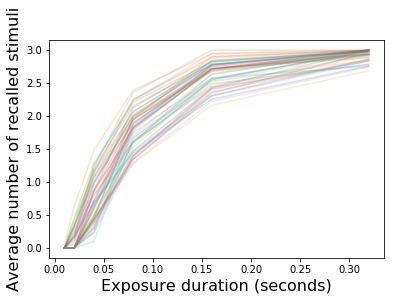

In [43]:
from matplotlib import pyplot

# Count the number of participants.
n_participants = data.shape[1]

# Loop through all participants, and plot the data for each.
for i in range(n_participants):
    # Plot the exposure duration on the x-axis, and the
    # average score for the current participant on the
    # y-axis.
    pyplot.plot(expdur, data[:,i], alpha=0.2)

# Add axis labels to the plot.
pyplot.xlabel("Exposure duration (seconds)", fontsize=16)
pyplot.ylabel("Average number of recalled stimuli", fontsize=16)

Having all participants in one plot is a bit messy. Let's compute the average, and plot that instead.

Text(0,0.5,u'Average number of recalled stimuli')

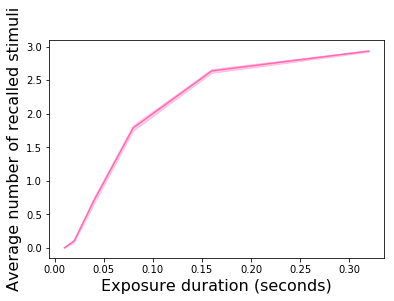

In [44]:
# Compute the average score across all participants.
m = numpy.mean(data, axis=1)
# Compute the standard deviation.
sd = numpy.std(data, axis=1, ddof=1)
# Compute the standard error of the mean.
sem = sd / numpy.sqrt(n_participants)

# Plot the average and the standard error of the mean.
pyplot.plot(expdur, m, color="#FF69B4")
pyplot.fill_between(expdur, m-sem, m+sem, \
    color="#FF69B4", alpha=0.3)

# Add axis labels to the plot.
pyplot.xlabel("Exposure duration (seconds)", fontsize=16)
pyplot.ylabel("Average number of recalled stimuli", fontsize=16)

Now that you have had a look at the data, it's time to start fitting the models. You would typically do this for every participant, but for now let's practice on the mean instead.

Fitting models to data works in much the same way as linear regression. First, you define a function to compute the residuals for each model:

In [45]:
# Model 1 was for a limited processing capacity.
def model_1(parameters, T, x, y):
    # The predicted y values based on model 1:
    y_pred = T * (1 - numpy.exp((- parameters[0] * x) / T))
    return y_pred

# Model 2 was for an unlimited processing capacity.
def model_2(parameters, T, x, y):
    # The predicted y values based on model 2:
    y_pred = T * (1 - numpy.exp(- parameters[0] * x))
    return y_pred

def residuals(parameters, T, x, y, model_nr):
    # Compute the predicted y values based on a model.
    if model_nr == 1:
        y_pred = model_1(parameters, T, x, y)
    elif model_nr == 2:
        y_pred = model_2(parameters, T, x, y)
    # Compute the difference between the measured outcome
    # and the predicted outcome (the residuals).
    res = y - y_pred
    # Compute the sum of squared residuals.
    s = numpy.sum(res**2)
    # Return the squared residuals.
    return s

Now that you've defined the models, you can find the best fitting parameters using a minimisation algorithm:

Model 1: C=29.06, SSres = 0.43
Model 2: C=9.69, SSres = 0.43


Text(0,0.5,u'Average number of recalled stimuli')

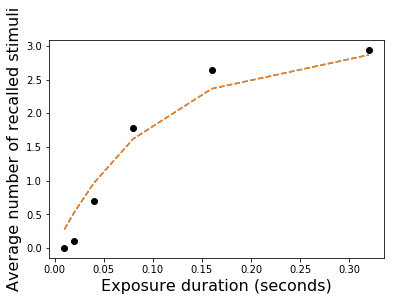

In [46]:
from scipy.optimize import minimize

# Go through all models.
for i, model in enumerate([model_1, model_2]):
    # Fit the current model.
    outcome = minimize(residuals, [0], \
        args=(n_stimuli, expdur, m, i+1), \
        method="L-BFGS-B")
    # Get the best parameters for the best fit.
    C = outcome.x[0]
    # Compute the residual sum of squares.
    ss_res = residuals(outcome.x, n_stimuli, \
        expdur, m, i+1)

    print("Model %d: C=%.2f, SSres = %.2f" \
        % (i+1, C, ss_res))

    # Compute the predicted outcome values.
    y_pred = model(outcome.x, n_stimuli, expdur, m)
    # Plot the predicted outcome.
    pyplot.plot(expdur, y_pred, '--', label="model %d" % (i+1))

# Plot the average.
pyplot.plot(expdur, m, 'o', color="#000000")
# Add axis labels to the plot.
pyplot.xlabel("Exposure duration (seconds)", fontsize=16)
pyplot.ylabel("Average number of recalled stimuli", fontsize=16)

From this plot, which model would you say fits best?

Why, from a mathematical perspective, do you think the two models fit equally well? (Think about the relationship between parameters.)

## Fitting a model with two free parameters

Did you notice how at exposure durations of 10 milliseconds, participants tend not to recall any stimuli? Perhaps our assumption that participants can use the full exposure duration to process information does not hold true. Maybe participants need a bit of initial time to visually process the stimuli before they can start encoding them into short-term memory?

This is an interesting suggestion, and one that can be written down as an equation. Recall our first model? It assumed that the processing time $\tau$ was the entire exposure duration (let's call that $t$).

$E(score)_{1} = T (1 - \exp{({{-C \tau} \over {T}})})$

*where $\tau = t$*

But perhaps there is a *minimally effective exposure duration*, i.e. a brief period during which no encoding into short-term memory occurs yet. This time, let's call it $t_{0}$ thus needs to be subtracted from the total exposure duration $t$:

$\tau = t - t_{0}$

This means that our first model could be written like this:

$E(score)_{1} = T (1 - \exp{({{-C t} \over {T}})})$

And a version that does incorporate the minimally effective exposure duration could be written like this:

$E(score)_{3} = T (1 - \exp{({{-C (t - t_{0})} \over {T}})})$

We can also incorporate this in the models that did not have a limited processing capacity:

$E(score)_{2} = T (1 - \exp{(-C t)})$

$E(score)_{4} = T (1 - \exp{(-C (t - t_{0}))})$

We should create functions for these new models too:

In [47]:
# Model 1 was for a limited processing capacity.
def model_3(parameters, T, x, y):
    # The predicted y values based on model 3:
    y_pred = T * (1 - numpy.exp((- parameters[0] * \
        (x-parameters[1])) / T))
    return y_pred

# Model 2 was for an unlimited processing capacity.
def model_4(parameters, T, x, y):
    # The predicted y values based on model 4:
    y_pred = T * (1 - numpy.exp(- parameters[0] * \
        (x-parameters[1])))
    return y_pred

def residuals(parameters, T, x, y, model_nr):
    # Compute the predicted y values based on a model.
    if model_nr == 1:
        y_pred = model_1(parameters, T, x, y)
    elif model_nr == 2:
        y_pred = model_2(parameters, T, x, y)
    elif model_nr == 3:
        y_pred = model_3(parameters, T, x, y)
    elif model_nr == 4:
        y_pred = model_4(parameters, T, x, y)
    # Compute the difference between the measured outcome
    # and the predicted outcome (the residuals).
    res = y - y_pred
    # Compute the sum of squared residuals.
    s = numpy.sum(res**2)
    # Return the squared residuals.
    return s

Now let's fit ALL the models!

Model 1: C=29.06, t0=0.00, SSres = 0.43
Model 2: C=9.69, t0=0.00, SSres = 0.43
Model 3: C=38.61, t0=0.01, SSres = 0.08
Model 4: C=12.87, t0=0.01, SSres = 0.08


Text(0,0.5,u'Average number of recalled stimuli')

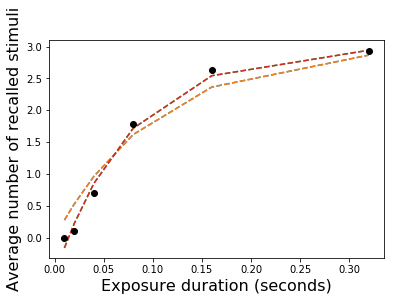

In [48]:
from scipy.optimize import minimize

# Go through all models.
for i, model in enumerate([model_1, model_2, model_3, model_4]):
    # Fit the current model.
    outcome = minimize(residuals, [0, 0], \
        args=(n_stimuli, expdur, m, i+1), \
        method="L-BFGS-B")
    # Get the best parameters for the best fit.
    C = outcome.x[0]
    t0 = outcome.x[1]
    # Compute the residual sum of squares.
    ss_res = residuals(outcome.x, n_stimuli, \
        expdur, m, i+1)

    print("Model %d: C=%.2f, t0=%.3f, SSres = %.2f" \
        % (i+1, C, t0, ss_res))

    # Compute the predicted outcome values.
    y_pred = model(outcome.x, n_stimuli, expdur, m)
    # Plot the predicted outcome.
    pyplot.plot(expdur, y_pred, '--', label="model %d" % (i+1))

# Plot the average.
pyplot.plot(expdur, m, 'o', color="#000000")
# Add axis labels to the plot.
pyplot.xlabel("Exposure duration (seconds)", fontsize=16)
pyplot.ylabel("Average number of recalled stimuli", fontsize=16)

Which of our models do you think fits best now?

*Mind you, this is still a very narrow model: It just describes behaviour in a single task. But it was derived within a wider computational framework. In addition, there is a way to incorporate a storage capacity for short-term memory (which we have ignored here). For more info, you can read the following paper:*

- Budesen, C. (1990). A theory of visual attention. *Psychological Review*, *97*(4), 523-547. doi:[10.1037/0033-295X.97.4.523](http://dx.doi.org/10.1037/0033-295X.97.4.523)

## Model comparison

One way to compare the models introduced above, is by measuring how much variance each explains. The logic behind this is that a better model should explain more variance. You could compute the coefficient of determination for each model, using the same equation that you used in linear regression last week:

$R^{2} = 1 - { { \Sigma^{n}_{i=1} (y_{i} - f_{i})^{2} }  \over { \Sigma^{n}_{i=1}(y_{i} - \bar{y})^{2} }}$

Where $y$ is the measured outcome (correctly recalled number of stimuli) for each participant $i$, and $f$ is the predicted number of stimuli for each participant.

Let's run the numbers:

In [49]:
# Go through all models.
for i, model in enumerate([model_1, model_2, model_3, model_4]):
    # Fit the current model.
    outcome = minimize(residuals, [0,0], \
        args=(n_stimuli, expdur, m, i+1), \
        method="L-BFGS-B")
    # Get the best parameters for the best fit.
    C = outcome.x[0]
    # Compute the residual sum of squares.
    ss_res = residuals(outcome.x, n_stimuli, \
        expdur, m, i+1)
    # Compute the total sum of squares.
    ss_tot = numpy.sum((m - numpy.mean(m))**2)
    # Compute the coefficient of determination.
    r_sq = 1.0 - (ss_res / ss_tot)

    print("Model %d: R squared = %.3f" \
        % (i+1, r_sq))

Model 1: R squared = 0.947
Model 2: R squared = 0.947
Model 3: R squared = 0.991
Model 4: R squared = 0.991


#### Introducing the Bayesian Information Criterion

One downside of using $R^{2}$ is that it doesn't distinguish between models that have very few free parameters, and models that have very many. As a rule, the more free parameters in a model, the easier it is to fit it to some data. This is not a feature of how good your model is, but rather of how flexible it is.

To counteract this, we can turn to ways in which we can quantify the *goodness of fit*. One of these metrics is the *adjusted R squared*, which is computed from the $R^{2}$, the number of observations ($n$), and the number of free parameters ($k$):

$R^{2}_{adjusted} = 1 - {{(1 - R^{2}) (n - 1)} \over {n - k - 1}}$

Another measure for the goodness of fit is the *Bayesian Information Criterion* (BIC). One way of computing the BIC directly uses the residuals:

$BIC = n + n \ln{(2 \pi)} + n \ln{({{SS_{res}} \over {n}})} + \ln{(n)}(k + 1)$

*where $n$ is the number of observations (in this case: number of exposure durations), and $k$ is the number free parameters in a model*

Both of these metrics do not only quantify how good a fit is, but also punishes models as a function of how many parameters they require.

Let's use the BIC to compare our models one last time:

In [50]:
# Go through all models.
for i, model in enumerate([model_1, model_2, model_3, model_4]):
    # Fit the current model.
    outcome = minimize(residuals, [0,0], \
        args=(n_stimuli, expdur, m, i+1), \
        method="L-BFGS-B")
    # Get the best parameters for the best fit.
    C = outcome.x[0]
    # Compute the residual sum of squares.
    ss_res = residuals(outcome.x, n_stimuli, \
        expdur, m, i+1)
    # Compute the total sum of squares.
    ss_tot = numpy.sum((m - numpy.mean(m))**2)
    # Compute the coefficient of determination.
    r_sq = 1.0 - (ss_res / ss_tot)
    
    # Count the number of observations.
    n = len(expdur)
    # Set the number of free parameters.
    if i in [0,1]:
        # The first two models have one free 
        # parameter: C
        k = 1
    elif i in [2,3]:
        # The second two models have two free
        # parameters: C and t0
        k = 2
    # Compute the Bayesian Information Criterion.
    bic = n + n*numpy.log(2*numpy.pi) + \
        n*numpy.log(ss_res/n) + \
        numpy.log(n)*(k+1)

    print("Model %d: BIC = %.2f" \
        % (i+1, bic))

Model 1: BIC = 4.82
Model 2: BIC = 4.82
Model 3: BIC = -3.81
Model 4: BIC = -3.81


Choosing which model fits best is done by comparison of BICs. By convention, you choose the lowest BIC. This is the best fitting model. You then compute the differences between that BIC and the other models' BICs. The resulting values, ${\Delta}BIC$, are usually interpreted using the guidelines of Raftery (1995), who considers ${\Delta}BIC$ values of 2-6 positive evidence in favour of the best fitting model, values of 6-10 as strong evidence, and values over 10 as very stong evidence.

Note that normally, you would fit a model to each participant, not to the average of the whole sample. You can then compute a $BIC$ for each participant. The sum across all participants of the $BIC$ values for a model is them compared against the other models' sums.

Such a procedure would look like this in code:

In [51]:
# Go through models 1 and 3.
for i in [0,2]:
    # Get the model function for this model.
    if i == 0:
        model = model_1
    elif i == 2:
        model = model_3

    # Count the number of participants.
    n_participants = data.shape[1]

    # Maintain a list of BIC values for
    # all participants.
    bic = numpy.zeros(n_participants, dtype=float)
    
    # Go through all participants.
    for j in range(n_participants):

        # Fit the current model.
        outcome = minimize(residuals, [0,0], \
            args=(n_stimuli, expdur, m, i+1), \
            method="L-BFGS-B")

        # Get the best parameters for the best fit.
        C = outcome.x[0]
        t0 = outcome.x[1]

        # Compute the residual sum of squares.
        ss_res = residuals(outcome.x, n_stimuli, \
            expdur, m, i+1)
        # Compute the total sum of squares.
        ss_tot = numpy.sum((m - numpy.mean(m))**2)
        # Compute the coefficient of determination.
        r_sq = 1.0 - (ss_res / ss_tot)

        # Count the number of observations.
        n = len(expdur)
        # Set the number of free parameters.
        if i in [0,1]:
            # The first two models have one free 
            # parameter: C
            k = 1
        elif i in [2,3]:
            # The second two models have two free
            # parameters: C and t0
            k = 2
        # Compute the Bayesian Information Criterion.
        bic[j] = n + n*numpy.log(2*numpy.pi) + \
            n*numpy.log(ss_res/n) + \
            numpy.log(n)*(k+1)

    print("Model %d: BIC sum = %.2f" \
        % (i+1, numpy.sum(bic)))

Model 1: BIC sum = 241.13
Model 3: BIC sum = -190.65
